In [1]:
import json
import requests
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as pp
import folium
import branca.colormap as cm
#from datetime import datetime
#import time


In [2]:
url='https://opendata-download-metobs.smhi.se/api/version/1.0/parameter/1.json'
response=requests.get(url) 
data4=json.loads(response.text)
df4=DataFrame(data4['station'])
df4.columns
#print(df4.name)
print(df4[['latitude','longitude','id','name','height','active']] )


     latitude  longitude        id                    name   height  active
0     59.3098    14.2919  17121000  1712 Ristjärn Fjärryta    0.000    True
1     65.5300    14.9700    154860         Abelvattnet Aut  665.000   False
2     68.3538    18.8166    188800                  Abisko  393.380   False
3     68.3538    18.8164    188790              Abisko Aut  392.303    True
4     65.9857    18.9195    158990                  Abraur  368.079    True
..        ...        ...       ...                     ...      ...     ...
952   66.2646    22.8365    172790      Överkalix-Svartbyn   46.000   False
953   66.2618    22.8427    172770    Överkalix-Svartbyn A   61.024    True
954   66.3860    23.6155    173810              Övertorneå   59.508    True
955   63.7788    13.0734    133470                 Överäng  450.000   False
956   58.3500    16.8333     86700             Övre Gränsö    5.000   False

[957 rows x 6 columns]


In [3]:
df5=df4[(df4.active==True)]
print(len(df5))
#df6=df5[(df5.id<10000000)]
#print(len(df6))
I=0
for i in df5.id:
#    print(i)

    print(I)
    url='https://opendata-download-metobs.smhi.se/api/version/1.0/parameter/1/station/'+str(i)+'/period/latest-hour/data.json'
    url2='https://opendata-download-metobs.smhi.se/api/version/1.0/parameter/6/station/'+str(i)+'/period/latest-hour/data.json'
    response=requests.get(url)
    if response.status_code == 200:
        data=json.loads(response.text)
        df=DataFrame(data['value'])
        if df.empty == 0:
            _=df.rename(columns={'value':'T'},inplace=True)
            df['date'] = pd.to_datetime(df['date']/1000,unit='s') 
            df['id'] = i 
            if I==0:
                df7=df
            else:
                df7=pd.concat([df7,df],axis=0, join='outer')
    response=requests.get(url2)
    if response.status_code == 200:
        data=json.loads(response.text)
        df=DataFrame(data['value'])
        if df.empty == 0:
            _=df.rename(columns={'value':'rh'},inplace=True)
            df['date'] = pd.to_datetime(df['date']/1000,unit='s') 
            df['id'] = i 
            if I==0:
                df7rh=df
            else:
                df7rh=pd.concat([df7rh,df],axis=0, join='outer')
            I+=1


299
0
0
1
1
2
2
2
3
4
5
5
5
5
6
7
7
7
8
9
10
11
11
12
12
13
14
15
16
17
18
18
19
20
21
21
22
22
23
24
24
25
26
27
27
28
28
29
30
30
31
32
32
33
34
35
36
36
37
38
39
39
40
41
42
42
43
43
43
44
45
46
47
48
49
50
51
51
52
53
54
55
55
55
56
57
58
59
60
60
60
61
61
62
62
62
63
64
64
64
64
65
66
66
67
67
68
68
68
69
70
71
72
72
73
73
74
74
75
76
77
78
79
80
81
82
83
84
85
85
85
86
87
88
88
89
89
90
90
91
91
92
92
92
93
93
94
94
95
96
96
96
96
97
97
98
99
100
101
102
103
103
104
104
104
104
105
106
106
107
108
108
109
110
111
112
113
113
114
115
116
116
116
116
116
116
116
117
118
119
120
121
122
122
122
122
123
124
125
126
127
127
127
128
128
129
129
129
130
130
131
132
133
134
135
135
135
135
136
137
138
138
139
140
141
142
143
144
144
145
145
145
146
147
148
149
150
151
152
152
152
153
154
155
155
156
156
157
158
159
160
160
161
162
163
163
164
165
166
167
168
168
168
169
170
170
171
172
173
174
175
175
175
175
176
176
177
178
178
179
179
180
181
182
183
183
184
184
184
184
185
186
187
187

In [4]:
df8=df5.merge(df7,how='inner',on='id') 
df8=df8.merge(df7rh,how='inner',on='id') 
df8['T'] = df8['T'].astype('float')
df8['rh'] = df8['rh'].astype('float')
df8['longitude'] = df8['longitude'].astype('float')
df8['latitude'] = df8['latitude'].astype('float')

print(df8)

                           name                         owner ownerCategory  \
0                    Abisko Aut  Polarforskningssekretariatet       CLIMATE   
1                    Abisko Aut  Polarforskningssekretariatet       CLIMATE   
2                    Abisko Aut  Polarforskningssekretariatet       CLIMATE   
3                    Abisko Aut  Polarforskningssekretariatet       CLIMATE   
4                      Adelsö A                          SMHI       CLIMATE   
..                          ...                           ...           ...   
759  Östersund-Frösön Flygplats                      Swedavia       CLIMATE   
760        Överkalix-Svartbyn A                          SMHI       CLIMATE   
761        Överkalix-Svartbyn A                          SMHI       CLIMATE   
762        Överkalix-Svartbyn A                          SMHI       CLIMATE   
763        Överkalix-Svartbyn A                          SMHI       CLIMATE   

    measuringStations      id   height  latitude  l

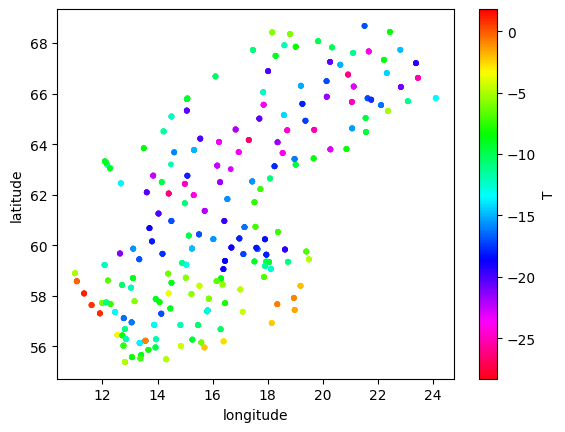

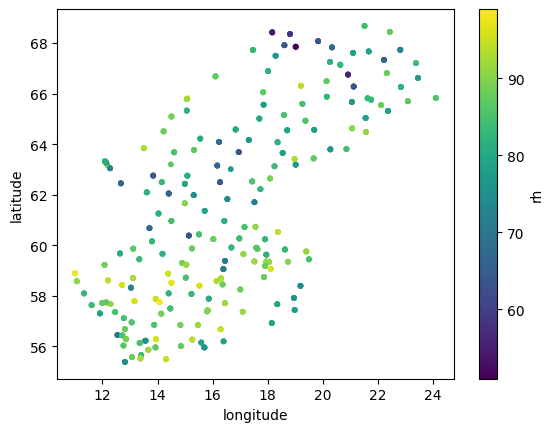

In [5]:
df8.plot.scatter(x = 'longitude', y = 'latitude', c= 'T', s = 10, colormap='hsv_r');

df8.plot.scatter(x = 'longitude', y = 'latitude', c= 'rh', s = 10, colormap='viridis');
pp.show()

In [6]:
geo=df8[['latitude','longitude','T']]
m = folium.Map(
    location=[geo.latitude.mean(), geo.longitude.mean()],tiles="Stamen Terrain",
    zoom_start=5, control_scale=True 
)

In [7]:


#from matplotlib import cmm
#colormap = cm.LinearColormap(colors=['blue','red'], vmin=-30,vmax=0)
colormap = cm.LinearColormap(colors=['pink','purple','darkblue','blue','lightblue','cyan','green','lightgreen','yellow','orange','red','brown'], index=range(-40,15,5),vmin=-30,vmax=15)
#cm.linear.RdGy.to_step(10).scale(5, 100)
#colormap = cm.LinearColormap(colors='jet', index=[-20,10],vmin=-20,vmax=20)
#colormap = cm.LinearColormap(colors=['darkblue','red'], index=[-40,10],vmin=-40,vmax=10)
#lat = list(df.latitude)
#lon = list(df.longitude)
#pow = list(df.power)
dat=df8["date_x"].iloc[0]
geo=df8[['latitude','longitude','T']]
#m = folium.Map(
#    location=[geo.latitude.mean(), geo.longitude.mean()],tiles="Stamen Terrain",
#    zoom_start=7, control_scale=True 

m = folium.Map(
    location=[60, 16],tiles="Stamen Terrain",
    zoom_start=7, control_scale=True 

)
for index, location_info in geo.iterrows():
    color=colormap(location_info["T"])
    folium.CircleMarker(        
        [location_info["latitude"], location_info["longitude"]],
        radius=10,
        fill=True,
        color=color,
        fill_color=color,
        popup=location_info["T"]
    ).add_to(m)
html = f'''\
  <head><title>Temperature map</title></head>\
  <center><h2>Date: </h2>{dat}<br>\
  '''
title_html = f'''
             <head><title>Temperature map</title></head>
             '''
head_html = '''
            <center><h4 style="margin-bottom:5"; width="200px">{dat}</h4></center>
             '''

html = f'''\
<head><title>Temperature map</title></head>\
<center><h2>{dat} </h2><br /></center>\
'''

m.get_root().html.add_child(folium.Element(html))

m

